In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)

## 0. Index

- 1. Carregando e validando os dados
    Carregamento dos dados originais e analise simples dos dados

- 2. DataFrame tratado para EDA
    Copia do DF original para realizar EDA, podendo ser alterado conforme necessario

- 3. Pipeline ML
    Preparacao dos dados e execucao dos modelos com copia separada do DF original

## 1. Carregando e validando os dados

In [2]:
df = pd.read_csv('../../data/Obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.isnull().sum()

gender            0
age               0
height            0
weight            0
family_history    0
favc              0
fcvc              0
ncp               0
caec              0
smoke             0
ch2o              0
scc               0
faf               0
tue               0
calc              0
mtrans            0
obesity           0
dtype: int64

In [6]:
df['obesity'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [7]:
df['caec'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [8]:
df['mtrans'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [9]:
df['calc'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [ ]:
df['tue'].unique()

In [29]:
for col in df.columns:
    print(f"Coluna {col}:", df[col].unique())

Coluna gender: ['Female' 'Male']
Coluna age: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
Coluna height: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
Coluna weight: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
Coluna family_history: ['yes' 'no']
Coluna favc: ['no' 'yes']
Coluna fcvc: [2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.21498  1.522001 2.703436 2.362918 2.14084  2.5596
 2.336044 1.813234 2.724285 2.71897  1.133844 1.757466 2.979383 2.204914
 2.927218 2.88853  2.890535 2.530066 2.241606 1.003566 2.652779 2.897899
 2.483979 2.945967 2.478891 2.784464 1.005578 2.938031 2.842102 1.889199

In [10]:
df['obesity'].groupby(df['obesity']).count()

obesity
Insufficient_Weight    272
Normal_Weight          287
Obesity_Type_I         351
Obesity_Type_II        297
Obesity_Type_III       324
Overweight_Level_I     290
Overweight_Level_II    290
Name: obesity, dtype: int64

In [27]:
df.describe()

,age,height,weight,fcvc,ncp,ch2o,faf,tue
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 2. DataFrame tratado para EDA

In [11]:
df_tratado = df.copy()

df_tratado.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### Tratando ordinais

In [12]:
encoder_orders = {
    "obesity": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
    "caec": ["no", "Sometimes", "Frequently", "Always"],
    "calc": ["no", "Sometimes", "Frequently", "Always"]
}

categorias = list(encoder_orders.values())
original_cols = list(encoder_orders.keys())
encoded_cols = [col + '_encoded' for col in list(encoder_orders.keys())]

ord_encoder = OrdinalEncoder(categories=categorias)
encoded_cols_result = ord_encoder.fit_transform(df_tratado[original_cols])
df_tratado[encoded_cols] = encoded_cols_result

df_tratado.head()

,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,scc,faf,tue,calc,mtrans,obesity,obesity_encoded,caec_encoded,calc_encoded
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,1.0,0.0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,1.0,1.0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1.0,1.0,2.0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2.0,1.0,2.0
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3.0,1.0,1.0


### Tratando binarios

In [13]:
bool_cols = [
    'family_history',
    'scc'
]  

bool_cols_name = list(map(lambda c: c + '_bool', bool_cols))

df_tratado[bool_cols_name] = df_tratado[bool_cols].replace({'yes': True, 'no': False})

df_tratado.head()

/tmp/ipykernel_6101/419712223.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_tratado[bool_cols_name] = df_tratado[bool_cols].replace({'yes': True, 'no': False})


,gender,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,...,faf,tue,calc,mtrans,obesity,obesity_encoded,caec_encoded,calc_encoded,family_history_bool,scc_bool
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,...,0.0,1.0,no,Public_Transportation,Normal_Weight,1.0,1.0,0.0,True,False
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,...,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1.0,1.0,1.0,True,True
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,...,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1.0,1.0,2.0,True,False
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,...,2.0,0.0,Frequently,Walking,Overweight_Level_I,2.0,1.0,2.0,False,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,...,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3.0,1.0,1.0,False,False


### Tratando categoricas

In [14]:
cat_cols = [
    'gender',
    'mtrans'
]

df_tratado = pd.get_dummies(df_tratado, columns=cat_cols)

df_tratado.head()

,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,...,calc_encoded,family_history_bool,scc_bool,gender_Female,gender_Male,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,...,0.0,True,False,True,False,False,False,False,True,False
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,...,1.0,True,True,True,False,False,False,False,True,False
2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,...,2.0,True,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,...,2.0,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,...,1.0,False,False,False,True,False,False,False,True,False


In [15]:
df_tratado.head()

,age,height,weight,family_history,favc,fcvc,ncp,caec,smoke,ch2o,...,calc_encoded,family_history_bool,scc_bool,gender_Female,gender_Male,mtrans_Automobile,mtrans_Bike,mtrans_Motorbike,mtrans_Public_Transportation,mtrans_Walking
0,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,...,0.0,True,False,True,False,False,False,False,True,False
1,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,...,1.0,True,True,True,False,False,False,False,True,False
2,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,...,2.0,True,False,False,True,False,False,False,True,False
3,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,...,2.0,False,False,False,True,False,False,False,False,True
4,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,...,1.0,False,False,False,True,False,False,False,True,False


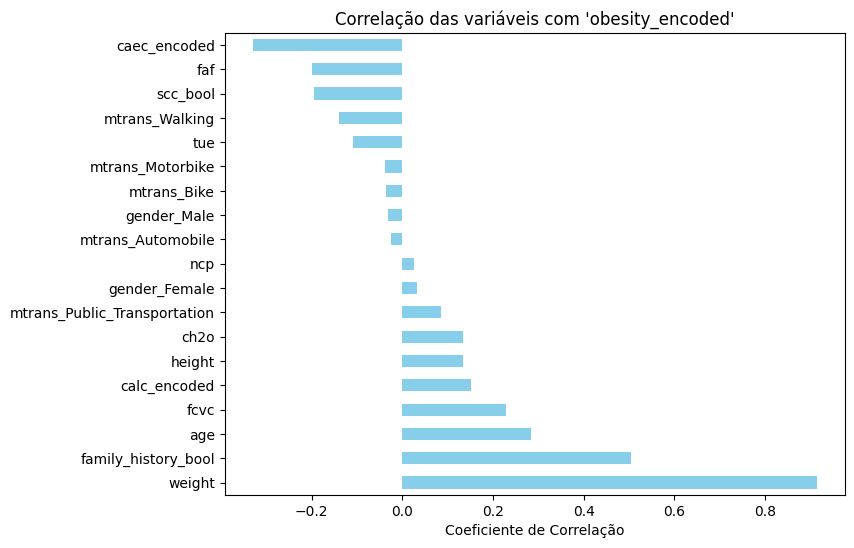

In [16]:
target = 'obesity_encoded'
corr = df_tratado.corr(numeric_only=True)[target].drop(target).sort_values(ascending=False)

plt.figure(figsize=(8,6))
corr.plot(kind='barh', color='skyblue')
plt.xlabel("Coeficiente de Correlação")
plt.title(f"Correlação das variáveis com '{target}'")
plt.show()


## 3. Pipeline ML

### Dataset usado no modelo

In [ ]:
df_model = df.copy()

### Preprocessamento

In [17]:
target_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

ord_cols_encoder_orders = {
    #"obesity": ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'],
    "caec": ["no", "Sometimes", "Frequently", "Always"],
    "calc": ["no", "Sometimes", "Frequently", "Always"]
}

ord_cols = list(ord_cols_encoder_orders.keys())

bool_cols = [
    'family_history',
    'scc'
]

onehot_cols = [
    'gender',
    'mtrans'
]

In [18]:
# Target encoder
target_encoder = OrdinalEncoder(categories=[target_order])

# Ordinal encoder
categorias = list(ord_cols_encoder_orders.values())

ord_trns = OrdinalEncoder(categories=categorias)

# OneHot encoder
onehot_trns = OneHotEncoder(handle_unknown="ignore")

# Processing boolean columnms
def bool_transformer(X):
    return np.where(X == "yes", 1, 0)

bool_trns = FunctionTransformer(bool_transformer)

In [19]:
target_encoder.fit_transform(df[["obesity"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [6.],
       [6.],
       [6.]], shape=(2111, 1))

In [20]:
preprocessor = ColumnTransformer([
    ("ordinais", ord_trns, ord_cols),
    ("nominais", onehot_trns, onehot_cols),
    ("binarias", bool_trns, bool_cols)
    #("numericas", scaler, numeric_cols)
])

In [21]:
model = Pipeline([
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [ ]:
features_selecionadas = []

# TODO: Selecionar melhores features e retirar comentario 
#       da proxima linha
# X = df_model[features_selecionadas]
X = df_model.drop(columns=["obesity"])
y = df_model["obesity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [23]:
# Treinar o modelo
model.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('ordinais', ...), ('nominais', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [24]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [25]:
y_pred = model.predict(X_test)

print("🔹 Acurácia:", accuracy_score(y_test, y_pred))
print("🔹 F1 Score:", f1_score(y_test, y_pred, average='macro'))
#print("🔹 ROC AUC:", roc_auc_score(y_test, y_proba, multi_class='ovr'))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


🔹 Acurácia: 0.5035460992907801
🔹 F1 Score: 0.4414120242691671

Matriz de Confusão:
 [[30  8  1 15  0  0  0]
 [15 24  2  5  7  5  0]
 [ 1  3 39 19  8  0  0]
 [ 0  4 10 45  0  1  0]
 [ 0  1  0  0 64  0  0]
 [ 6  6 11 13 11 11  0]
 [ 5  1 17 28  5  2  0]]

Relatório de Classificação:
                      precision    recall  f1-score   support

Insufficient_Weight       0.53      0.56      0.54        54
      Normal_Weight       0.51      0.41      0.46        58
     Obesity_Type_I       0.49      0.56      0.52        70
    Obesity_Type_II       0.36      0.75      0.49        60
   Obesity_Type_III       0.67      0.98      0.80        65
 Overweight_Level_I       0.58      0.19      0.29        58
Overweight_Level_II       0.00      0.00      0.00        58

           accuracy                           0.50       423
          macro avg       0.45      0.49      0.44       423
       weighted avg       0.45      0.50      0.45       423



/home/arthur/Documentos/Pos/Fase4/fiap-tech4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/arthur/Documentos/Pos/Fase4/fiap-tech4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/arthur/Documentos/Pos/Fase4/fiap-tech4/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha